# Lecture 14: Fourier Analysis I

## The Dirac Delta function as a limit

Consider the function
$$
\hat{E}_{\alpha} (k) = \frac{\alpha}{\pi (\alpha^2 + k^2)}.
$$

In the limit $\alpha\to 0$, this function becomes taller and slimmer, approaching
a peak of infinite height and zero width: A Dirac $\delta$ "function" (actually a distribution).

Note: This is not the only limit expression for the $\delta$ "function". There are infinitely many.

In [1]:
using Interact
using PyPlot
PyPlot.svg(true)

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b259bc1dfe140ed8f0da8b1fc8d2e3ff788d8a11-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b259bc1dfe140ed8f0da8b1fc8d2e3ff788d8a11-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

true

In [2]:
E(α, k) = α/(π*(α^2 + k^2))

fig, ax = subplots()

xs = LinRange(-1, 1, 1001)

@manipulate for α=slider(10.0.^LinRange(-2, 0, 20), value=1.0, label="α")
    withfig(fig, clear=false) do
        ax.cla()
        E_α(x) = E(α, x)
        ax.plot(xs, E_α.(xs), label="α = $(round(100α)/100)")

        ax.set_xlim(-1, 1)
        ax.set_ylim(0, 10)

        ax.set_xlabel(L"$k$")
        ax.set_ylabel(L"E_{\alpha}(k)")
        ax.set_title(L"Delta function $\delta(k)$ as a limit")

        ax.legend()
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-4125bb14-d31b-44a6-b8da-5e1610d8281f", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
20, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js", "knockout_punches"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/all.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/style.css", "/home/henrik/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.0127427\",\"0.0162378\",\"0.0206914\",\"0.0263665\",\"0.0335982\",\"0.0428133\",\"0.0545559\",\"0.0695193\",\"0.0885867\",\"0.112884\",\"0.143845\",\"0.183298\",\"0.233572\",\"0.297635\",\"0.379269\",\"0.483293\",\"0.615848\",\"0.78476\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-4125bb14-d31b-44a6-b8da-5e1610d8281f\",\"id\":\"ob_03\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-4125bb14-d31b-44a6-b8da-5e1610d8281f\",\"id\":\"ob_02\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"formatted_val\"]=ko.computed(    function(){\n        return this.formatted_vals()[parseInt(this.index())-1];\n    }\n,this)]\n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-4125bb14-d31b-44a6-b8da-5e

In [3]:
E_prime(α, k) = -2k*α/(π*(α^2 + k^2)^2)

fig, ax = subplots()

xs = LinRange(-1, 1, 1001)

@manipulate for α=slider(10.0.^LinRange(-2, 0, 20), value=1.0, label="α")
    withfig(fig, clear=false) do
        ax.cla()
        E_α(x) = E_prime(α, x)
        ax.plot(xs, E_α.(xs), label="α = $(round(100α)/100)")

        ax.set_xlim(-1, 1)
        ax.set_ylim(-50, 50)

        ax.set_xlabel(L"$k$")
        ax.set_ylabel(L"E_{\alpha}(k)")
        ax.set_title(L"Delta function derivative $\delta'(k)$ as a limit")

        ax.legend()
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-bfd2c73d-4da8-4f5d-8747-0ce7788c8692", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
20, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js", "knockout_punches"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/all.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/style.css", "/home/henrik/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.0127427\",\"0.0162378\",\"0.0206914\",\"0.0263665\",\"0.0335982\",\"0.0428133\",\"0.0545559\",\"0.0695193\",\"0.0885867\",\"0.112884\",\"0.143845\",\"0.183298\",\"0.233572\",\"0.297635\",\"0.379269\",\"0.483293\",\"0.615848\",\"0.78476\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-bfd2c73d-4da8-4f5d-8747-0ce7788c8692\",\"id\":\"ob_10\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-bfd2c73d-4da8-4f5d-8747-0ce7788c8692\",\"id\":\"ob_09\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"formatted_val\"]=ko.computed(    function(){\n        return this.formatted_vals()[parseInt(this.index())-1];\n    }\n,this)]\n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-bfd2c73d-4da8-4f5d-8747-0c

## The Gibbs phenomenon
We consider the Fourier series of the periodic, discontinuous sawtooth function

$$
f(t) = t \qquad 0 < t \leq 1,
$$

continued periodically with period $T=1$.
The Fourier series is

$$
f(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{\nu=1}^\infty \frac{1}{\nu} \sin(2\pi \nu t).
$$

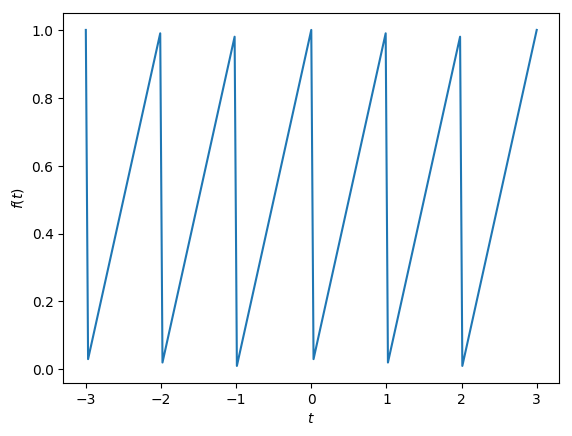

PyObject Text(26.000000000000007, 0.5, '$f(t)$')

In [4]:
f(t) = mod1(t, 1.0)

figure()
ts = LinRange(-3, 3, 201)

plot(ts, f.(ts))
xlabel(L"t")
ylabel(L"f(t)")

In [5]:
function Fourier_f(t, N)
    """ Return the truncated Fourier series of the sawtooth function f(t)
    """
    F = 0.5
    
    for ν=1:N
        F -= sin(2π*ν*t)/(π*ν)
    end
    
    return F
end

Fourier_f (generic function with 1 method)

In [6]:
fg, ax = subplots()

@manipulate for N=slider(1:100, value=1, label="N")
    withfig(fg, clear=false) do
        ts = LinRange(0, 2, 4001)

        ax.cla()
        ax.plot(ts, f.(ts), label=L"f(t)")
        ax.plot(ts, broadcast(t -> Fourier_f(t, N), ts), label="N=$(N)")
        
        ax.set_ylim(-0.2, 1.2)

        ax.set_xlabel(L"t")
        ax.set_ylabel(L"f(t)")
        ax.set_title("Gibbs phenomenon for truncated Fourier series")
#         ax.legend()
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-768af49c-92e0-4292-9e89-b0bed3474e9d", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js", "knockout_punches"=>"/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/all.js", "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/style.css", "/home/henrik/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"95\",\"96\",\"97\",\"98\",\"99\",\"100\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-768af49c-92e0-4292-9e89-b0bed3474e9d\",\"id\":\"ob_16\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-768af49c-92e0-4292-9e89-b0bed3474e9d\",\"id\":\"ob_15\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n  